# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data = student_data.reset_index().rename(columns={'index': 'StudentID'})
student_data

,StudentID,Age,Tardies
0,0,17,10
1,1,51,1
2,2,27,5
3,3,21,9
4,4,36,4
5,5,48,2
6,6,19,9
7,7,26,6
8,8,54,0
9,9,30,3


Draw a dispersion diagram (scatter plot) for the data.

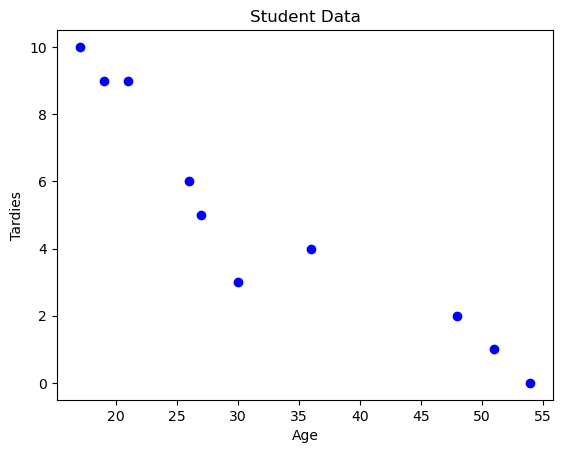

In [6]:
x = student_data["Age"]
y = student_data["Tardies"]
plt.scatter(x,y, c="blue")
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.title("Student Data")
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
"""
it seems like as they are related, but in an antiproportional way. The higher the age, the lower the Tardies
"""

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
# Your response here.
#correlation:
correlation = student_data.corr()
display(correlation)

#covariance:
cov = student_data.cov()
display(cov)

,StudentID,Age,Tardies
StudentID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


,StudentID,Age,Tardies
StudentID,9.166667,7.722222,-3.722222
Age,7.722222,187.655556,-45.566667
Tardies,-3.722222,-45.566667,12.544444


In [ ]:
"""
As both Correlation and Covariance show negative Values for the Correlation between Age and Tardies it can be said, that
the older a student gets, the less Tardies he get. Therefore, it is an anti-correlation. Moreover 0.9 as Correlation and
-45.566667 as Covariance indicate a that the strenght of the Correlation is quite high. 
The Difference between those two measures is that Covariance is not standardized, that's why the range is unbound and 
interpretation of the strenght more difficult.
"""

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [15]:
#Linear regression

X = np.array(student_data["Age"])
y = np.array(student_data["Tardies"])

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)


model = LinearRegression()
model.fit(X,y)
slope = model.coef_
interception = model.intercept_


reg_line = interception + slope*X
pred = model.predict(X)

print("r^2 :", model.score(X,y))
print("rmse: ", np.sqrt(mean_squared_error(pred, y)))


r^2 : 0.8820265558250109
rmse:  1.1540884648655088


Plot your regression model on your scatter plot.

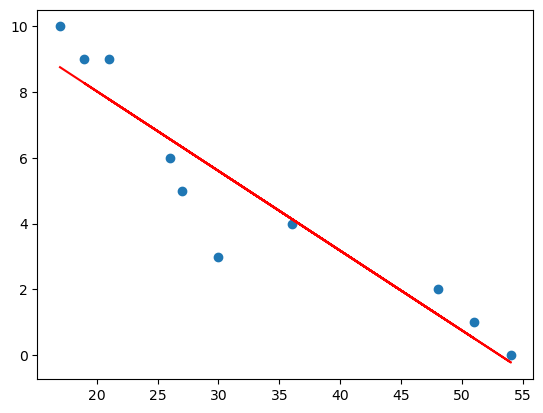

In [17]:
plt.plot(X, reg_line, c = "red")
plt.scatter(X,y)
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [19]:
"""
The regression line proves my assumptions from above, the line cleary points out the antiproportional correlation of the dataframe.
"""

'\nThe regression line proves my assumptions from above, the line cleary points out the antiproportional correlation of the dataframe.\n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [22]:
df = pd.read_csv("vehicles.csv")
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [31]:
my_list = ["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]
x = df[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = df["CO2 Emission Grams/Mile"]
corr = df.corr()
print("The correlation to CO2 Emission Grams/Mile")
print("""""")

for i in my_list:
    print(f"{i}: {corr.loc[i, 'CO2 Emission Grams/Mile']}")

The correlation to CO2 Emission Grams/Mile

Year: -0.22229960295056816
Cylinders: 0.7523925537297476
Fuel Barrels/Year: 0.9861886621428765
Combined MPG: -0.9262290389336434
Fuel Cost/Year: 0.9308651512201764


/var/folders/bk/02hh56sx1b7622qtqhym98tc0000gn/T/ipykernel_30681/170324083.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [ ]:
# the most usefull column to predict CO2 Emissions will be the "Fuel Barrels/Year", 
# because the correlation (0.98) is the closest to 1
# also important are "Combined MPG" and "Fuel Cost/Year"

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [33]:
x = df[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = df["CO2 Emission Grams/Mile"]

model = LinearRegression()

model.fit(x,y)
slope = model.coef_
interception = model.intercept_


reg_line = interception + slope[0]*x["Year"]+slope[1]*x["Cylinders"]+slope[2]*x["Fuel Barrels/Year"]+slope[3]*x["Combined MPG"]+slope[4]*x["Fuel Cost/Year"]
pred = model.predict(x)



Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [34]:
print("r^2 :", model.score(x,y))
print("rmse: ", np.sqrt(mean_squared_error(pred, y)))

"""Very accurate, as i assumed before most important is 'Fuel Barrels/Year'
   Least important is 'Year' 
   """

r^2 : 0.9808734920269122
rmse:  16.465711496024085


"Very accurate, as i assumed before most important is Fuel Barrels/Year \n   Least important is 'Year' "

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [52]:
parties = pd.DataFrame({"X":[1,3,4,6,8,9,11,14], "Y":[1,2,4,4,5,7,8,13]})
parties

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

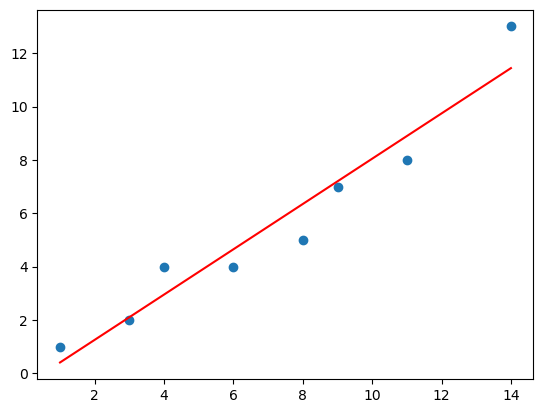

In [53]:
X = np.array(parties["X"])
y = np.array(parties["Y"])

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression()
model.fit(X,y)


slope = model.coef_
interception = model.intercept_
reg_line = interception + slope*X

plt.plot(X, reg_line, c="red")
plt.scatter(X,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [54]:
# looks like a proportional relationship between X and Y 

In [55]:
pred = model.predict(X)
print("r^2 :", model.score(X,y))
print("rmse: ", np.sqrt(mean_squared_error(pred, y)))

r^2 : 0.9316696375519905
rmse:  0.933387444318875


### Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [56]:
parties.drop(7, inplace=True)  

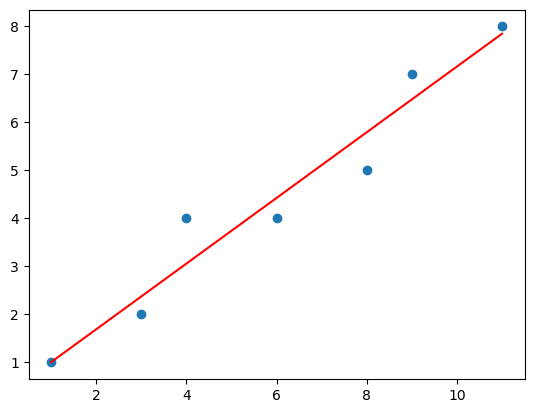

In [57]:
X = np.array(parties["X"])
y = np.array(parties["Y"])

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression()
model.fit(X,y)


slope = model.coef_
interception = model.intercept_
reg_line = interception + slope*X

plt.plot(X, reg_line, c="red")
plt.scatter(X,y)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
"""Removed the last datapoint as it seemed like an outlier, now the regression line is more accurate"""

In [58]:
pred = model.predict(X)

In [59]:
print("r^2 :", model.score(X,y))
print("rmse: ", np.sqrt(mean_squared_error(pred, y)))

r^2 : 0.9433811802232854
rmse:  0.5523118096904349


In [ ]:
# the mean squarred error got divided in half and the score of the model also increased a bit 
# that means the model is now more accurate